https://github.com/7astro7/full_fred

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from full_fred.fred import Fred
import datetime as dt
import requests
from bs4 import BeautifulSoup
import re

________________
FRED Econ Data

**Issues to be resolved:**
* I need to find which types of series data are available (which economic metrics) other than potential GDP and GNPCA
* I need to clean the data (some years are missing)

In [2]:
fred = Fred('../data/api_key')
fred.get_api_key_file()

'../data/api_key'

In [4]:
fred.get_child_categories(0)

{'categories': [{'id': 32991,
   'name': 'Money, Banking, & Finance',
   'parent_id': 0},
  {'id': 10,
   'name': 'Population, Employment, & Labor Markets',
   'parent_id': 0},
  {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
  {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
  {'id': 32455, 'name': 'Prices', 'parent_id': 0},
  {'id': 32263, 'name': 'International Data', 'parent_id': 0},
  {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
  {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]}

In [5]:
test = fred.get_series_df('GDPPOT')
test[test['value'] != '.']

,realtime_start,realtime_end,date,value
4,2023-09-08,2023-09-08,1950-01-01,2218.5665855133384
5,2023-09-08,2023-09-08,1950-04-01,2248.1618216748607
6,2023-09-08,2023-09-08,1950-07-01,2277.0496823235985
7,2023-09-08,2023-09-08,1950-10-01,2306.715167343248
8,2023-09-08,2023-09-08,1951-01-01,2336.504742120727
...,...,...,...,...
303,2023-09-08,2023-09-08,2024-10-01,21052.3
304,2023-09-08,2023-09-08,2025-01-01,21143.69
305,2023-09-08,2023-09-08,2025-04-01,21235.79
306,2023-09-08,2023-09-08,2025-07-01,21329.03


In [6]:
len(test)

340

In [7]:
fred.series_stack.keys()

dict_keys(['get_series_df'])

In [8]:
fred.release_stack.keys()

dict_keys([])

In [9]:
fred.get_child_categories(0)['categories']

[{'id': 32991, 'name': 'Money, Banking, & Finance', 'parent_id': 0},
 {'id': 10, 'name': 'Population, Employment, & Labor Markets', 'parent_id': 0},
 {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
 {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
 {'id': 32455, 'name': 'Prices', 'parent_id': 0},
 {'id': 32263, 'name': 'International Data', 'parent_id': 0},
 {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
 {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]

In [10]:
fred.category_stack['get_child_categories']

{'categories': [{'id': 32991,
   'name': 'Money, Banking, & Finance',
   'parent_id': 0},
  {'id': 10,
   'name': 'Population, Employment, & Labor Markets',
   'parent_id': 0},
  {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
  {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
  {'id': 32455, 'name': 'Prices', 'parent_id': 0},
  {'id': 32263, 'name': 'International Data', 'parent_id': 0},
  {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
  {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]}

In [11]:
fred.source_stack['get_all_sources']

KeyError: 'get_all_sources'

In [13]:
test = fred.get_series_df('GNPCA')
test[test['value'] != '.']

,realtime_start,realtime_end,date,value
0,2023-09-08,2023-09-08,1929-01-01,1120.718
1,2023-09-08,2023-09-08,1930-01-01,1025.678
2,2023-09-08,2023-09-08,1931-01-01,958.927
3,2023-09-08,2023-09-08,1932-01-01,834.769
4,2023-09-08,2023-09-08,1933-01-01,823.628
...,...,...,...,...
89,2023-09-08,2023-09-08,2018-01-01,18874.78
90,2023-09-08,2023-09-08,2019-01-01,19286.841
91,2023-09-08,2023-09-08,2020-01-01,18685.401
92,2023-09-08,2023-09-08,2021-01-01,19759.327


In [14]:
gnpca = fred.get_series_df('GNPCA')[['date', 'value']]

In [15]:
gnpca.set_index('date', inplace = True)

In [16]:
gnpca.index = pd.to_datetime(gnpca.index)

In [17]:
gnpca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 1929-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   value   94 non-null     object
dtypes: object(1)
memory usage: 1.5+ KB


In [18]:
gnpca.head()

,value
date,
1929-01-01,1120.718
1930-01-01,1025.678
1931-01-01,958.927
1932-01-01,834.769
1933-01-01,823.628


In [19]:
gnpca.isna().sum()

value    0
dtype: int64

In [20]:
gnpca['value'] = gnpca['value'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_21900\211970581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gnpca['value'] = gnpca['value'].astype(float)


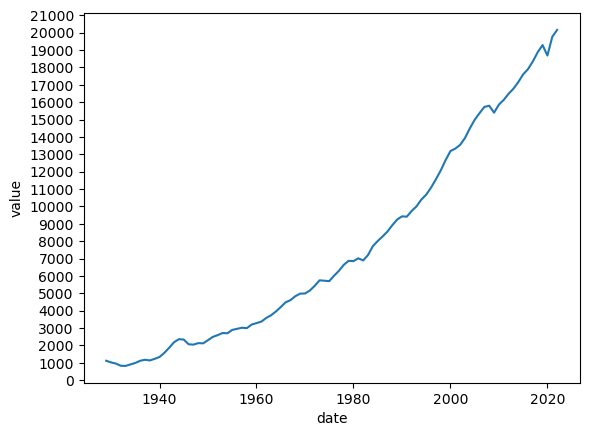

In [21]:
sns.lineplot(x = gnpca.index, y = gnpca['value']);
plt.yticks(range(0, int(max(gnpca['value'])) + 1000, 1000));

C:\Users\User\AppData\Local\Temp\ipykernel_21900\4166311938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric['value'] = metric['value'].astype(float)


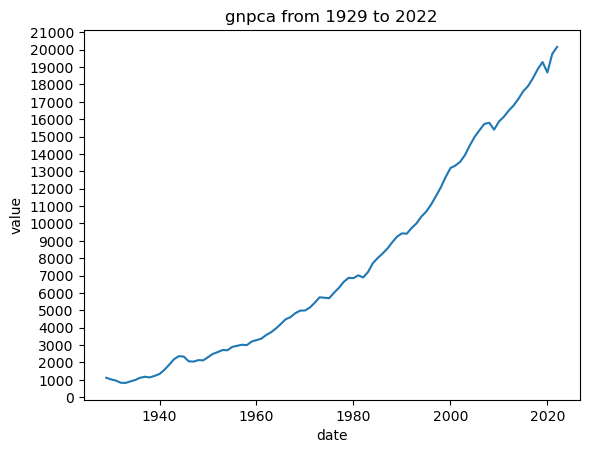

In [22]:
def ez_plotter(metric):
        metric_literal = metric
        metric = fred.get_series_df(metric)[['date', 'value']]
        metric.set_index('date', inplace = True)
        metric.index = pd.to_datetime(metric.index)
        metric['value'] = metric['value'].astype(float)

        sns.lineplot(x = metric.index, y = metric['value']);
        plt.yticks(range(0, int(max(metric['value'])) + 1000, 1000));
        plt.title(f"{metric_literal} from {metric.index.year[0]} to {metric.index.year[-1]}")
    
ez_plotter('gnpca')

In [23]:
gdppot =  fred.get_series_df('GDPPOT')[['date', 'value']]

In [24]:
gdppot[gdppot['value'] ==  '.']

,date,value
0,1949-01-01,.
1,1949-04-01,.
2,1949-07-01,.
3,1949-10-01,.
308,2026-01-01,.
309,2026-04-01,.
310,2026-07-01,.
311,2026-10-01,.
312,2027-01-01,.
313,2027-04-01,.


Missing potential GDP data for the far future makes sense, but why these data are missing for the year 1949 is harder to explain.

In order to allow these data to be visualized, I'll create a subset which doesn't extend into the future, then set the missing data in 1949 to be null. Then I'll plot, impute and plot again.

In [25]:
gdppot.set_index('date', inplace = True)

In [26]:
gdppot.index = pd.to_datetime(gdppot.index)

In [27]:
gdppot_subset = gdppot.loc[:'2025-12-31']

In [28]:
gdppot_subset.tail()

,value
date,
2024-10-01,21052.3
2025-01-01,21143.69
2025-04-01,21235.79
2025-07-01,21329.03
2025-10-01,21423.29


In [5]:
test = fred.get_series_df('GDP')
test[test['value'] != '.']

,realtime_start,realtime_end,date,value
4,2023-09-08,2023-09-08,1947-01-01,243.164
5,2023-09-08,2023-09-08,1947-04-01,245.968
6,2023-09-08,2023-09-08,1947-07-01,249.585
7,2023-09-08,2023-09-08,1947-10-01,259.745
8,2023-09-08,2023-09-08,1948-01-01,265.742
...,...,...,...,...
305,2023-09-08,2023-09-08,2022-04-01,25248.476
306,2023-09-08,2023-09-08,2022-07-01,25723.941
307,2023-09-08,2023-09-08,2022-10-01,26137.992
308,2023-09-08,2023-09-08,2023-01-01,26529.774


Consumer Price Index Inflation:

In [12]:
# https://fred.stlouisfed.org/series/FPCPITOTLZGUSA
test = fred.get_series_df('FPCPITOTLZGUSA')
test

,realtime_start,realtime_end,date,value
0,2023-09-08,2023-09-08,1960-01-01,1.45797598627786
1,2023-09-08,2023-09-08,1961-01-01,1.07072414764723
2,2023-09-08,2023-09-08,1962-01-01,1.19877334820185
3,2023-09-08,2023-09-08,1963-01-01,1.2396694214876
4,2023-09-08,2023-09-08,1964-01-01,1.27891156462583
...,...,...,...,...
58,2023-09-08,2023-09-08,2018-01-01,2.44258329692818
59,2023-09-08,2023-09-08,2019-01-01,1.81221007526015
60,2023-09-08,2023-09-08,2020-01-01,1.23358439630637
61,2023-09-08,2023-09-08,2021-01-01,4.69785886363739


Core inflation

In [11]:
#https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL
test = fred.get_series_df('CORESTICKM159SFRBATL')
test

,realtime_start,realtime_end,date,value
0,2023-09-08,2023-09-08,1967-12-01,3.383497007
1,2023-09-08,2023-09-08,1968-01-01,3.659987292
2,2023-09-08,2023-09-08,1968-02-01,3.682012499
3,2023-09-08,2023-09-08,1968-03-01,4.151667589
4,2023-09-08,2023-09-08,1968-04-01,4.165427174
...,...,...,...,...
663,2023-09-08,2023-09-08,2023-03-01,6.451708317
664,2023-09-08,2023-09-08,2023-04-01,6.322748661
665,2023-09-08,2023-09-08,2023-05-01,6.000605583
666,2023-09-08,2023-09-08,2023-06-01,5.62652874


Unemployment

In [16]:
#https://fred.stlouisfed.org/series/UNRATE/
test = fred.get_series_df('UNRATE')
test

,realtime_start,realtime_end,date,value
0,2023-09-08,2023-09-08,1948-01-01,3.4
1,2023-09-08,2023-09-08,1948-02-01,3.8
2,2023-09-08,2023-09-08,1948-03-01,4.0
3,2023-09-08,2023-09-08,1948-04-01,3.9
4,2023-09-08,2023-09-08,1948-05-01,3.5
...,...,...,...,...
903,2023-09-08,2023-09-08,2023-04-01,3.4
904,2023-09-08,2023-09-08,2023-05-01,3.7
905,2023-09-08,2023-09-08,2023-06-01,3.6
906,2023-09-08,2023-09-08,2023-07-01,3.5


Productivity (non-farm output/hour)

In [15]:
#https://fred.stlouisfed.org/series/PRS85006092
test = fred.get_series_df('PRS85006092')
test

,realtime_start,realtime_end,date,value
0,2023-09-08,2023-09-08,1947-04-01,9.4
1,2023-09-08,2023-09-08,1947-07-01,-11.7
2,2023-09-08,2023-09-08,1947-10-01,18.0
3,2023-09-08,2023-09-08,1948-01-01,1.8
4,2023-09-08,2023-09-08,1948-04-01,-1.0
...,...,...,...,...
300,2023-09-08,2023-09-08,2022-04-01,-3.7
301,2023-09-08,2023-09-08,2022-07-01,1.2
302,2023-09-08,2023-09-08,2022-10-01,1.6
303,2023-09-08,2023-09-08,2023-01-01,-1.2


Capital intensity

In [48]:
#https://fred.stlouisfed.org/series/MPU4900083
capital_intensity = fred.get_series_df('MPU4900083')
capital_intensity.head()

,realtime_start,realtime_end,date,value
0,2023-09-08,2023-09-08,1988-01-01,1.3
1,2023-09-08,2023-09-08,1989-01-01,1.3
2,2023-09-08,2023-09-08,1990-01-01,3.8
3,2023-09-08,2023-09-08,1991-01-01,5.2
4,2023-09-08,2023-09-08,1992-01-01,2.6


In [49]:
capital_intensity.set_index('date', inplace = True)

In [50]:
capital_intensity.index = pd.to_datetime(capital_intensity.index)
capital_intensity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1988-01-01 to 2022-01-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  35 non-null     object
 1   realtime_end    35 non-null     object
 2   value           35 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [51]:
capital_intensity.isna().sum()

realtime_start    0
realtime_end      0
value             0
dtype: int64

In [52]:
capital_intensity['value'] = capital_intensity['value'].astype(float)

In [53]:
capital_intensity.dtypes

realtime_start     object
realtime_end       object
value             float64
dtype: object

In [55]:
capital_intensity['value']

date
1988-01-01     1.3
1989-01-01     1.3
1990-01-01     3.8
1991-01-01     5.2
1992-01-01     2.6
1993-01-01     0.4
1994-01-01    -0.4
1995-01-01     1.9
1996-01-01     2.4
1997-01-01     2.1
1998-01-01     4.0
1999-01-01     5.5
2000-01-01     4.6
2001-01-01     6.7
2002-01-01     6.0
2003-01-01     3.4
2004-01-01     1.5
2005-01-01     1.8
2006-01-01     1.5
2007-01-01     2.6
2008-01-01     5.2
2009-01-01     9.0
2010-01-01     0.8
2011-01-01    -0.5
2012-01-01    -0.5
2013-01-01     0.9
2014-01-01     0.2
2015-01-01     0.6
2016-01-01     1.8
2017-01-01     1.4
2018-01-01     1.1
2019-01-01     2.3
2020-01-01    11.0
2021-01-01    -3.0
2022-01-01    -0.8
Name: value, dtype: float64

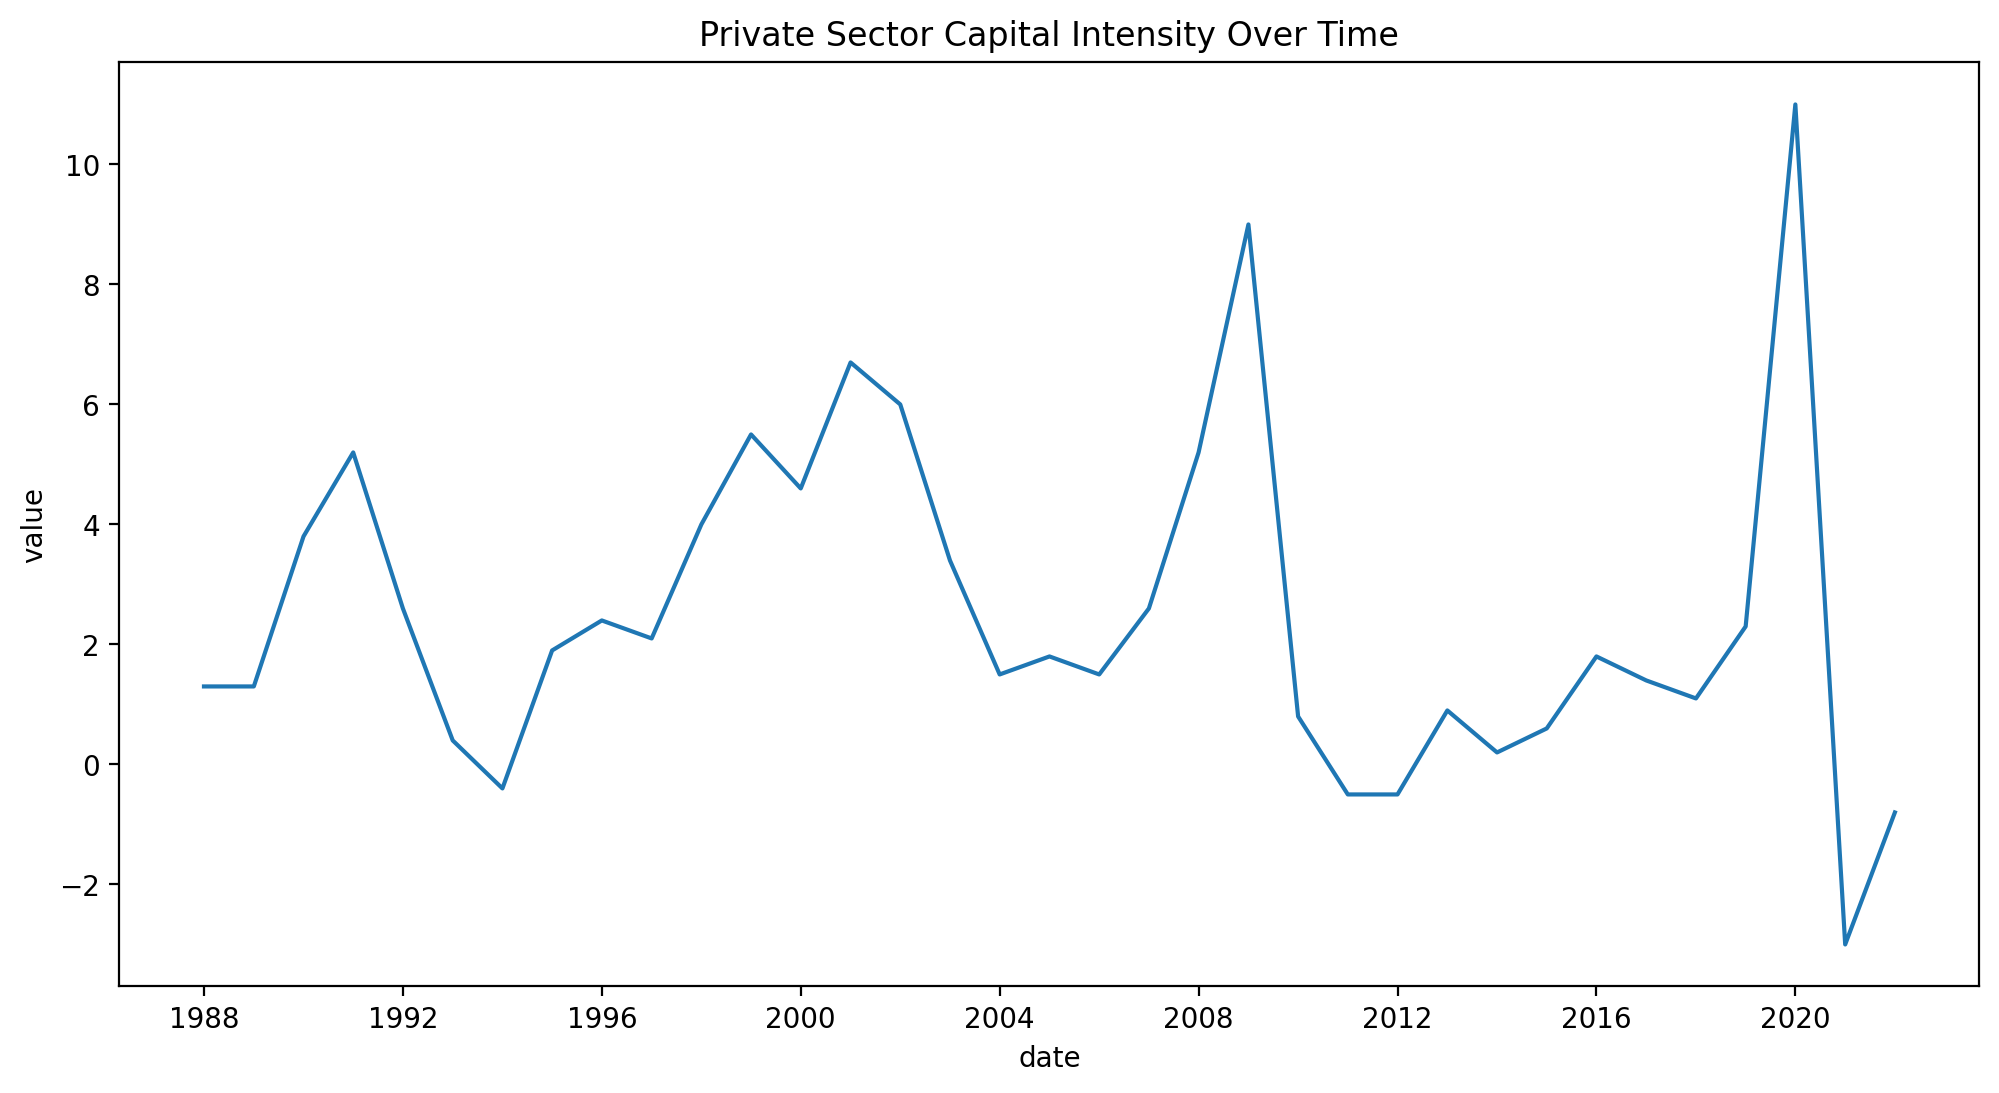

In [64]:
plt.figure(figsize = (12,6), dpi = 200)
sns.lineplot(x = capital_intensity.index, y = capital_intensity['value']);
plt.title('Private Sector Capital Intensity Over Time');

**TARGET:** Federal Funds Effective Rate

In [65]:
#https://fred.stlouisfed.org/series/FEDFUNDS
interest_rates = fred.get_series_df('FEDFUNDS')
interest_rates.head()

,realtime_start,realtime_end,date,value
0,2023-09-08,2023-09-08,1954-07-01,0.80
1,2023-09-08,2023-09-08,1954-08-01,1.22
2,2023-09-08,2023-09-08,1954-09-01,1.07
3,2023-09-08,2023-09-08,1954-10-01,0.85
4,2023-09-08,2023-09-08,1954-11-01,0.83


In [66]:
interest_rates.set_index('date', inplace = True)
interest_rates.index = pd.to_datetime(interest_rates.index)
interest_rates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 830 entries, 1954-07-01 to 2023-08-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  830 non-null    object
 1   realtime_end    830 non-null    object
 2   value           830 non-null    object
dtypes: object(3)
memory usage: 25.9+ KB


In [67]:
interest_rates.head()

,realtime_start,realtime_end,value
date,,,
1954-07-01,2023-09-08,2023-09-08,0.80
1954-08-01,2023-09-08,2023-09-08,1.22
1954-09-01,2023-09-08,2023-09-08,1.07
1954-10-01,2023-09-08,2023-09-08,0.85
1954-11-01,2023-09-08,2023-09-08,0.83


In [68]:
interest_rates.isna().sum()

realtime_start    0
realtime_end      0
value             0
dtype: int64

In [69]:
interest_rates['value'] = interest_rates['value'].astype(float)

In [81]:
interest_rates.loc['1985-01-01':]

,realtime_start,realtime_end,value
date,,,
1985-01-01,2023-09-08,2023-09-08,8.35
1985-02-01,2023-09-08,2023-09-08,8.50
1985-03-01,2023-09-08,2023-09-08,8.58
1985-04-01,2023-09-08,2023-09-08,8.27
1985-05-01,2023-09-08,2023-09-08,7.97
...,...,...,...
2023-04-01,2023-09-08,2023-09-08,4.83
2023-05-01,2023-09-08,2023-09-08,5.06
2023-06-01,2023-09-08,2023-09-08,5.08


#### plt.figure(figsize = (12,6), dpi = 200)
sns.lineplot(x = capital_intensity.iloc['1985-01-01':].index, y = capital_intensity.iloc['1985-01-01':]['value'], label = 'capital intensity');
sns.lineplot(x = interest_rates.iloc['1985-01-01':].index, y = interest_rates.iloc['1985-01-01':]['value'], label = 'interest rates');
plt.title('Private Sector Capital Intensity Over Time');
plt.legend();

    GDP ✓
    Potential GDP ✓
    Real Gross National Product (need to research) ✓
    Inflation ✓
    Core inflation ✓
    Unemployment ✓
    Productivity ✓
    Private-sector capital intensity ✓

________
Importing beige book data

Issues:
* I need to iterate through a large number of URLs in order to access archived transcripts
* The way the URL is formatted has changed over time:
    Current format: https://www.federalreserve.gov/monetarypolicy/beigebook201701.htm
    Old format: https://www.federalreserve.gov/fomc/beigebook/1996/19961030/default.htm
   
This is the archive of all transcripts, so maybe I can use the HTML to iterate through similar to the reddit api:
https://www.federalreserve.gov/monetarypolicy/beige-book-archive.htm

**Possible solution:**
The Minneapolis FED has a better website with a more consistent format:
    https://www.minneapolisfed.org/beige-book-reports/2010/2010-12-su
    
This would also make seperating the different branches into different features, along with east coast / west coast, top 3 cities, etc. possible

In [29]:
url = "https://www.federalreserve.gov/monetarypolicy/beigebook202301-summary.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    text_data = soup.get_text()

In [30]:
#text_data

In [31]:
text_data = re.sub(r'\n+', ' ', text_data)
#text_data

In [32]:
text_data = re.sub(r'\r+', '', text_data)
#text_data

In [33]:
url = "https://www.federalreserve.gov/monetarypolicy/beigebook202301-summary.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    text_data = soup.get_text()
    
text_data = re.sub(r'\n+', ' ', text_data)
text_data = re.sub(r'\r+', '', text_data)
text_data = text_data.split('National Summary')
text_data = text_data[2]
text_data = text_data.split('Back to Top')
national_summary = text_data[0]
national_summary

" Overall Economic Activity Overall economic activity was relatively unchanged since the previous report. Five Districts reported slight or modest increases in overall activity, six noted no change or slight declines, and one cited a significant decline. On balance, contacts generally expected little growth in the months ahead. Consumer spending increased slightly, with some retailers reporting more robust sales over the holidays. Other retailers noted that high inflation continued to reduce consumers' purchasing power, particularly among low- and moderate-income households. Auto sales were flat on average, but some dealers noted that increased vehicle availability had boosted sales. Tourism contacts reported moderate to robust activity augmented by strong holiday travel. Manufacturers indicated that activity declined modestly on average, and, in many Districts, reported that supply chain disruptions had eased. Housing markets continued to weaken, with sales and construction declining 

In [34]:
url = "https://www.federalreserve.gov/monetarypolicy/beigebook202301-summary.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    text_data = soup.get_text()
    
text_data = re.sub(r'\n+', ' ', text_data)
text_data = re.sub(r'\r+', '', text_data)
text_data = text_data.split('National Summary')
text_data = text_data[2]
text_data = text_data.split('Back to Top')
national_summary = text_data[0]

# labor_markets
labor_markets = national_summary.split('Labor Markets')
labor_markets = labor_markets[1]

# prices
# prices = national_summary.split('Prices')
# prices = prices[1]
# prices

In [ ]:
def report_scraper(start_year, end_year):
    for y in range(start_year)